In [25]:
import pandas as pd
import numpy as np

In [26]:
eco_rounds = pd.read_csv("../../data/vct_2022/matches/eco_rounds.csv")



In [27]:
eco_rounds = eco_rounds.loc[ (eco_rounds["Map"]=="Fracture")]
eco_rounds["Outcome"] = eco_rounds["Outcome"].apply(lambda x: 1 if x == "Win" else 0)
eco_rounds["Loadout Value"] = eco_rounds["Loadout Value"].apply(lambda x: int(x.replace(".","").replace("k","00")))
eco_rounds["Remaining Credits"] = eco_rounds["Remaining Credits"].apply(lambda x: int(x.replace(".","").replace("k","00")))

eco_rounds

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
260,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,1,ZETA DIVISION,3700,200,Eco: 0-5k,1
261,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,1,LOUD,3700,300,Eco: 0-5k,0
262,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,2,ZETA DIVISION,16200,1400,Semi-buy: 10-20k,1
263,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,2,LOUD,4100,7500,Eco: 0-5k,0
264,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,3,ZETA DIVISION,13600,13700,Semi-buy: 10-20k,0
...,...,...,...,...,...,...,...,...,...,...,...
358393,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,18,FunPlus Phoenix,22500,12000,Full buy: 20k+,1
358394,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,19,5MOKES,19000,1500,Semi-buy: 10-20k,1
358395,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,19,FunPlus Phoenix,22100,20800,Full buy: 20k+,0
358396,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,20,5MOKES,19500,3400,Semi-buy: 10-20k,0


In [28]:
maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07


In [29]:
team_ab_2022 = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team B", "Team A Score", "Team B Score"]]

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B,Team A Score,Team B Score
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,EDward Gaming,13,11
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,EDward Gaming,5,13
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,EDward Gaming,13,8
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,Team Liquid,13,10
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,Team Liquid,13,10
...,...,...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,FunPlus Phoenix,13,10
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,FunPlus Phoenix,14,12
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,FunPlus Phoenix,5,13
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,FunPlus Phoenix,7,13


In [30]:
#eco_rounds.keys()
for i in range(12, 17):
    print(i)

12
13
14
15
16


In [31]:
# change eco round data shape so that it can be compatible with agent pick dataframe.
# this cell is a sample to show how I will add eco rounds into team_ab_2023

display(team_ab_2022.rename(columns={"Team A":"Team"}))

round1_eco_rounds = eco_rounds[eco_rounds["Round Number"] == 1]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

display(round1_eco_rounds)

pd.merge(
    team_ab_2022.rename(columns={"Team A":"Team"})\
    ,round1_eco_rounds.drop(columns="Round Number")\
    ,on=keys
)\
.rename(columns={"Loadout Value":"R1_loadout_A", "Remaining Credits":"R1_remaining_credit_A", "Type":"R1_eco_type_A", "Outcome":"R1_outcome_A"})\
.rename(columns={"Team":"Team A", "Team B":"Team"})\
.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team'])\
.join(round1_eco_rounds.drop(columns="Round Number")\
      .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team'])\
)\
.reset_index()\
.rename(columns={"Loadout Value":"R1_loadout_B", "Remaining Credits":"R1_remaining_credit_B", "Type":"R1_eco_type_B", "Outcome":"R1_outcome_B"})\
.rename(columns={"Team":"Team B"})\

#team_ab_2022["Diff"]=team_ab_2022["R1_loadout_A"]-team_ab_2022["R1_loadout_B"]


,Tournament,Stage,Match Type,Match Name,Map,Team,Team B,Team A Score,Team B Score
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,EDward Gaming,13,11
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,EDward Gaming,5,13
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,EDward Gaming,13,8
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,Team Liquid,13,10
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,Team Liquid,13,10
...,...,...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,FunPlus Phoenix,13,10
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,FunPlus Phoenix,14,12
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,FunPlus Phoenix,5,13
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,FunPlus Phoenix,7,13


,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
260,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,1,ZETA DIVISION,3700,200,Eco: 0-5k,1
261,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,1,LOUD,3700,300,Eco: 0-5k,0
408,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,1,OpTic Gaming,3400,600,Eco: 0-5k,0
409,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,1,BOOM Esports,3400,500,Eco: 0-5k,1
790,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,1,OpTic Gaming,3500,400,Eco: 0-5k,1
...,...,...,...,...,...,...,...,...,...,...,...
357905,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 1,B8 Esports vs SMARACIS eSports,Fracture,1,SMARACIS eSports,3500,100,Eco: 0-5k,0
358190,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 2,One Breath Gaming vs FunPlus Phoenix,Fracture,1,One Breath Gaming,3600,300,Eco: 0-5k,0
358191,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 2,One Breath Gaming vs FunPlus Phoenix,Fracture,1,FunPlus Phoenix,3800,200,Eco: 0-5k,1
358358,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,1,5MOKES,3600,200,Eco: 0-5k,0


,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team B Score,R1_loadout_A,R1_remaining_credit_A,R1_eco_type_A,R1_outcome_A,R1_loadout_B,R1_remaining_credit_B,R1_eco_type_B,R1_outcome_B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,ZETA DIVISION,9,13,3700,200,Eco: 0-5k,1,3700,300,Eco: 0-5k,0
1,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,BOOM Esports,OpTic Gaming,13,3,3400,600,Eco: 0-5k,0,3400,500,Eco: 0-5k,1
2,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,LOUD,OpTic Gaming,13,10,3500,400,Eco: 0-5k,1,3500,300,Eco: 0-5k,0
3,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XERXIA Esports,XSET,13,11,3700,300,Eco: 0-5k,0,3700,300,Eco: 0-5k,1
4,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,100 Thieves,DRX,13,9,3600,300,Eco: 0-5k,1,3700,300,Eco: 0-5k,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Upper Quarterfinals,One Breath Gaming vs B8 Esports,Fracture,B8 Esports,One Breath Gaming,9,13,3900,300,Eco: 0-5k,1,3300,300,Eco: 0-5k,0
592,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Upper Semifinals,5MOKES vs KPI Gaming,Fracture,KPI Gaming,5MOKES,3,13,3600,300,Eco: 0-5k,1,3500,300,Eco: 0-5k,0
593,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 1,B8 Esports vs SMARACIS eSports,Fracture,SMARACIS eSports,B8 Esports,10,13,3400,300,Eco: 0-5k,1,3500,100,Eco: 0-5k,0
594,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 2,One Breath Gaming vs FunPlus Phoenix,Fracture,FunPlus Phoenix,One Breath Gaming,1,13,3600,300,Eco: 0-5k,0,3800,200,Eco: 0-5k,1


Column names are too long, so I am gonna make it shorter:\
Ri_A_lo: ith round loadout\
Ri_A_rc: ith round remaining credit\
Ri_A_et: ith round eco type\
Ri_A_win: ith round Team A win\
Similarly for B.

In [32]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

for i in range(17):
    team_ab_2022 =\
    pd.merge(
        team_ab_2022.rename(columns={"Team A":"Team"})\
        ,eco_rounds[eco_rounds["Round Number"] == i+1].drop(columns="Round Number")\
        ,on=keys
    )\
    .rename(columns={"Loadout Value":f"R{i+1}_A_lo", "Remaining Credits":f"R{i+1}_A_rc", "Type":f"R{i+1}_A_et", "Outcome":f"R{i+1}_A_win"})\
    .rename(columns={"Team":"Team A", "Team B":"Team"})\
    .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team'])\
    .join(eco_rounds[eco_rounds["Round Number"] == i+1].drop(columns="Round Number")\
        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team'])\
    )\
    .reset_index()\
    .rename(columns={"Loadout Value":f"R{i+1}_B_lo", "Remaining Credits":f"R{i+1}_B_rc", "Type":f"R{i+1}_B_et", "Outcome":f"R{i+1}_B_win"})\
    .rename(columns={"Team":"Team B"})\

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team B Score,R1_A_lo,...,R16_B_et,R16_B_win,R17_A_lo,R17_A_rc,R17_A_et,R17_A_win,R17_B_lo,R17_B_rc,R17_B_et,R17_B_win
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,ZETA DIVISION,9,13,3700,...,Full buy: 20k+,1,20200,3100,Full buy: 20k+,0,19100,2900,Semi-buy: 10-20k,1
1,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,LOUD,OpTic Gaming,13,10,3500,...,Full buy: 20k+,1,22200,4200,Full buy: 20k+,0,24700,8500,Full buy: 20k+,1
2,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XERXIA Esports,XSET,13,11,3700,...,Eco: 0-5k,0,23700,6500,Full buy: 20k+,0,23800,1700,Full buy: 20k+,1
3,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,100 Thieves,DRX,13,9,3600,...,Semi-buy: 10-20k,1,24900,5100,Full buy: 20k+,0,21300,15300,Full buy: 20k+,1
4,Valorant Champions 2022,Group Stage,Winner's (C),FunPlus Phoenix vs XSET,Fracture,XSET,FunPlus Phoenix,13,4,3700,...,Semi-buy: 10-20k,0,25100,17300,Full buy: 20k+,1,15200,1200,Semi-buy: 10-20k,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Champions Tour CIS Stage 1: Challengers 1,Open Qualifier,Round of 16,VCTRY Esports vs Team hz,Fracture,Team hz,VCTRY Esports,13,8,3700,...,Full buy: 20k+,0,18500,3500,Semi-buy: 10-20k,1,19100,2000,Semi-buy: 10-20k,0
521,Champions Tour CIS Stage 1: Challengers 1,Open Qualifier,Quarterfinals,FunPlus Phoenix vs Tactical Five,Fracture,Tactical Five,FunPlus Phoenix,13,7,3300,...,Semi-eco: 5-10k,0,22800,31500,Full buy: 20k+,1,23800,2100,Full buy: 20k+,0
522,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Upper Quarterfinals,One Breath Gaming vs B8 Esports,Fracture,B8 Esports,One Breath Gaming,9,13,3900,...,Semi-buy: 10-20k,0,21600,5200,Full buy: 20k+,1,9800,7800,Semi-eco: 5-10k,0
523,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 1,B8 Esports vs SMARACIS eSports,Fracture,SMARACIS eSports,B8 Esports,10,13,3400,...,Full buy: 20k+,1,10100,6800,Semi-buy: 10-20k,1,19200,1600,Semi-buy: 10-20k,0


In [33]:
#assert len(team_ab_2022.keys()) == ((5 + 2 + 2) + (12*4)*2)  # check the number of columns is correct.

In [34]:
# Add Team_A_win, Team_B_win columns
team_ab_2022["Team_A_win"] = (team_ab_2022["Team A Score"] - team_ab_2022["Team B Score"]) > 0
team_ab_2022["Team_B_win"] = (team_ab_2022["Team B Score"] - team_ab_2022["Team A Score"]) > 0

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team B Score,R1_A_lo,...,R17_A_lo,R17_A_rc,R17_A_et,R17_A_win,R17_B_lo,R17_B_rc,R17_B_et,R17_B_win,Team_A_win,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,ZETA DIVISION,9,13,3700,...,20200,3100,Full buy: 20k+,0,19100,2900,Semi-buy: 10-20k,1,False,True
1,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,LOUD,OpTic Gaming,13,10,3500,...,22200,4200,Full buy: 20k+,0,24700,8500,Full buy: 20k+,1,True,False
2,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XERXIA Esports,XSET,13,11,3700,...,23700,6500,Full buy: 20k+,0,23800,1700,Full buy: 20k+,1,True,False
3,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,100 Thieves,DRX,13,9,3600,...,24900,5100,Full buy: 20k+,0,21300,15300,Full buy: 20k+,1,True,False
4,Valorant Champions 2022,Group Stage,Winner's (C),FunPlus Phoenix vs XSET,Fracture,XSET,FunPlus Phoenix,13,4,3700,...,25100,17300,Full buy: 20k+,1,15200,1200,Semi-buy: 10-20k,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Champions Tour CIS Stage 1: Challengers 1,Open Qualifier,Round of 16,VCTRY Esports vs Team hz,Fracture,Team hz,VCTRY Esports,13,8,3700,...,18500,3500,Semi-buy: 10-20k,1,19100,2000,Semi-buy: 10-20k,0,True,False
521,Champions Tour CIS Stage 1: Challengers 1,Open Qualifier,Quarterfinals,FunPlus Phoenix vs Tactical Five,Fracture,Tactical Five,FunPlus Phoenix,13,7,3300,...,22800,31500,Full buy: 20k+,1,23800,2100,Full buy: 20k+,0,True,False
522,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Upper Quarterfinals,One Breath Gaming vs B8 Esports,Fracture,B8 Esports,One Breath Gaming,9,13,3900,...,21600,5200,Full buy: 20k+,1,9800,7800,Semi-eco: 5-10k,0,False,True
523,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 1,B8 Esports vs SMARACIS eSports,Fracture,SMARACIS eSports,B8 Esports,10,13,3400,...,10100,6800,Semi-buy: 10-20k,1,19200,1600,Semi-buy: 10-20k,0,False,True


For example, with this dataframe team_ab_2023, if you want to have information about 1st,2nd,3rd,13th,14th,15th, you can do the following.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
# #Model1_X_features = ["R1_A_lo"   #Model 1 is log reg over loadout values of both teams in the first half
#     ,"R1_B_lo"
#     ,"R2_A_lo"
#     ,"R2_B_lo"
#     ,"R3_A_lo"
#     ,"R3_B_lo"
#     ,"R4_A_lo"
#     ,"R4_B_lo"
#     ,"R5_A_lo"
#     ,"R5_B_lo"
#     ,"R6_A_lo"
#     ,"R6_B_lo"
#     ,"R7_A_lo"
#     ,"R7_B_lo"
#     ,"R8_A_lo"
#     ,"R8_B_lo"
#     ,"R9_A_lo"
#     ,"R9_B_lo"
#     ,"R10_A_lo"
#     ,"R10_B_lo"
#     ,"R11_A_lo"
#     ,"R11_B_lo"
#     ,"R12_A_lo"
#     ,"R12_B_lo"
#     ]

Model1_X_features = ["R13_A_lo"   #Model 1 is log reg over loadout values of both teams in the first half
    ,"R13_B_lo"
    ,"R14_A_lo"
    ,"R14_B_lo"
    ,"R15_A_lo"
    ,"R15_B_lo"
    ,"R16_A_lo"
    ,"R16_B_lo"
    ,"R17_A_lo"
    ,"R17_B_lo"
    ]


M1_X = team_ab_2022[Model1_X_features]
M1_y_aw = team_ab_2022["Team_A_win"]
M1_y_bw = team_ab_2022["Team_B_win"]
M1_y_amb = team_ab_2022["Team A Score"] - team_ab_2022["Team B Score"]
M1_y_bma = team_ab_2022["Team B Score"] - team_ab_2022["Team A Score"]

In [37]:
Model2_X_features = ["R1_A_lo"   #Model 1 is log reg over loadout values of both teams in the first quarter
    ,"R1_B_lo"
    ,"R2_A_lo"
    ,"R2_B_lo"
    ,"R3_A_lo"
    ,"R3_B_lo"
    ,"R4_A_lo"
    ,"R4_B_lo"
    ,"R5_A_lo"
    ,"R5_B_lo"
    ,"R6_A_lo"
    ,"R6_B_lo"
    ]



M2_X = team_ab_2022[Model2_X_features]
M2_y_aw = team_ab_2022["Team_A_win"]
M2_y_bw = team_ab_2022["Team_B_win"]
M2_y_amb = team_ab_2022["Team A Score"] - team_ab_2022["Team B Score"]
M2_y_bma = team_ab_2022["Team B Score"] - team_ab_2022["Team A Score"]

In [38]:
M1_X_aw_train, M1_X_aw_test, M1_y_aw_train, M1_y_aw_test = train_test_split(M1_X, M1_y_aw, test_size=0.2, random_state=1, shuffle=True)
M1_X_bw_train, M1_X_bw_test, M1_y_bw_train, M1_y_bw_test = train_test_split(M1_X, M1_y_bw, test_size=0.2, random_state=1, shuffle=True)

In [39]:
M2_X_aw_train, M2_X_aw_test, M2_y_aw_train, M2_y_aw_test = train_test_split(M2_X, M2_y_aw, test_size=0.2, random_state=1, shuffle=True)
M2_X_bw_train, M2_X_bw_test, M2_y_bw_train, M2_y_bw_test = train_test_split(M2_X, M2_y_bw, test_size=0.2, random_state=1, shuffle=True)

In [40]:
print(len(team_ab_2022))
print(len(M1_X))
print(len(M1_y_aw_test))
### Sanity check:
assert M1_X_aw_train.shape[0] == M1_y_aw_train.shape[0], "the number of data points are different"
assert M1_X_aw_test.shape[0] == M1_y_aw_test.shape[0], "the number of data points are different"

525
525
105


In [41]:
print(len(team_ab_2022))
print(len(M2_X))
print(len(M2_y_aw_test))
### Sanity check:
assert M2_X_aw_train.shape[0] == M2_y_aw_train.shape[0], "the number of data points are different"
assert M2_X_aw_test.shape[0] == M2_y_aw_test.shape[0], "the number of data points are different"

525
525
105


In [42]:
lgr_aw = LogisticRegression()
lgr_bw = LogisticRegression()

gbc_aw = GradientBoostingClassifier()
gbc_bw = GradientBoostingClassifier()

In [43]:
M2lgr_aw = LogisticRegression()
M2lgr_bw = LogisticRegression()

M2gbc_aw = GradientBoostingClassifier()
M2gbc_bw = GradientBoostingClassifier()

In [44]:
lgr_aw.fit(M1_X_aw_train, M1_y_aw_train)
lgr_aw_pred = lgr_aw.predict(M1_X_aw_test)
lgr_aw_acc = accuracy_score(M1_y_aw_test, lgr_aw_pred)

lgr_bw.fit(M1_X_bw_train, M1_y_bw_train)
lgr_bw_pred = lgr_bw.predict(M1_X_bw_test)
lgr_bw_acc = accuracy_score(M1_y_bw_test, lgr_bw_pred)

print("lgr_aw accuracy:", lgr_aw_acc)
print("lgr_bw accuracy:", lgr_bw_acc)
print("mean of lgr_aw_pred: {}".format(np.mean(lgr_aw_pred)))
print("mean of aw_test: {}".format(np.mean(M1_y_aw_test)))
print("mean of lgr_bw_pred: {}".format(np.mean(lgr_bw_pred)))
print("mean of bw_test: {}".format(np.mean(M1_y_bw_test)))
print("coefficients:", lgr_aw.coef_)

lgr_aw accuracy: 0.6095238095238096
lgr_bw accuracy: 0.6095238095238096
mean of lgr_aw_pred: 0.6666666666666666
mean of aw_test: 0.6
mean of lgr_bw_pred: 0.3333333333333333
mean of bw_test: 0.4
coefficients: [[-1.03513647e-03  1.35883536e-04  8.65765645e-05  7.98666055e-05
   2.18234198e-05  5.90862281e-05  5.62633633e-05 -4.31332070e-05
   5.85095270e-05 -4.38602363e-05]]


In [45]:
M2lgr_aw.fit(M2_X_aw_train, M2_y_aw_train)
M2lgr_aw_pred = M2lgr_aw.predict(M2_X_aw_test)
M2lgr_aw_acc = accuracy_score(M2_y_aw_test, M2lgr_aw_pred)

M2lgr_bw.fit(M2_X_bw_train, M2_y_bw_train)
M2lgr_bw_pred = M2lgr_bw.predict(M2_X_bw_test)
M2lgr_bw_acc = accuracy_score(M2_y_bw_test, M2lgr_bw_pred)

print("lgr_aw accuracy:", M2lgr_aw_acc)
print("lgr_bw accuracy:", M2lgr_bw_acc)
print("mean of lgr_aw_pred: {}".format(np.mean(M2lgr_aw_pred)))
print("mean of aw_test: {}".format(np.mean(M2_y_aw_test)))
print("mean of lgr_bw_pred: {}".format(np.mean(M2lgr_bw_pred)))
print("mean of bw_test: {}".format(np.mean(M2_y_bw_test)))
print("coefficients:", M2lgr_aw.coef_)

lgr_aw accuracy: 0.6190476190476191
lgr_bw accuracy: 0.6190476190476191
mean of lgr_aw_pred: 0.6190476190476191
mean of aw_test: 0.6
mean of lgr_bw_pred: 0.38095238095238093
mean of bw_test: 0.4
coefficients: [[ 1.83203686e-04  7.52315491e-06  2.88594687e-05 -2.81290170e-05
   9.82095206e-06 -1.06011799e-05  4.89448693e-05 -6.58641963e-05
   2.90130556e-05 -2.12878589e-05  3.53501537e-05 -3.95621645e-05]]


In [46]:
gbc_aw.fit(M1_X_aw_train, M1_y_aw_train)
gbc_aw_pred = gbc_aw.predict(M1_X_aw_test)
gbc_aw_acc = accuracy_score(M1_y_aw_test, gbc_aw_pred)

gbc_bw.fit(M1_X_bw_train, M1_y_bw_train)
gbc_bw_pred = gbc_bw.predict(M1_X_bw_test)
gbc_bw_acc = accuracy_score(M1_y_bw_test, gbc_bw_pred)

print("gbc_aw accuracy:", gbc_aw_acc)
print("gbc_bw accuracy:", gbc_bw_acc)
print("mean of gbc_aw_pred: {}".format(np.mean(gbc_aw_pred)))
print("mean of aw_test: {}".format(np.mean(M1_y_aw_test)))
print("mean of gbc_bw_pred: {}".format(np.mean(gbc_bw_pred)))
print("mean of bw_test: {}".format(np.mean(M1_y_bw_test)))

gbc_aw accuracy: 0.6190476190476191
gbc_bw accuracy: 0.6285714285714286
mean of gbc_aw_pred: 0.6761904761904762
mean of aw_test: 0.6
mean of gbc_bw_pred: 0.3142857142857143
mean of bw_test: 0.4


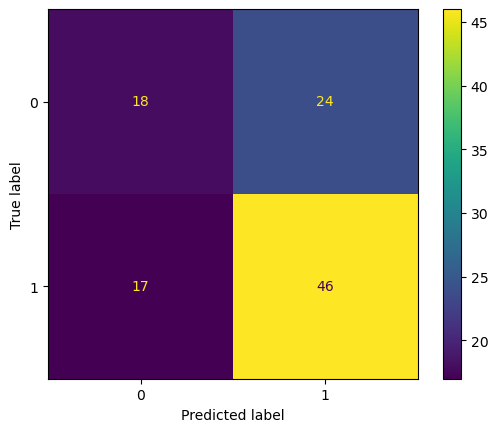

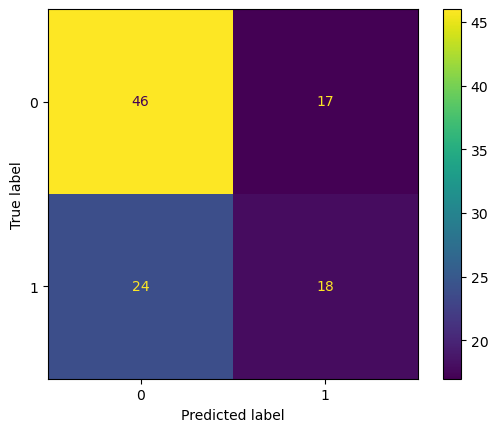

In [47]:
cm_aw_lgr = confusion_matrix(M1_y_aw_test, lgr_aw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aw_lgr)
disp.plot()
plt.show()

cm_bw_lgr = confusion_matrix(M1_y_bw_test, lgr_bw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bw_lgr)
disp.plot()
plt.show()

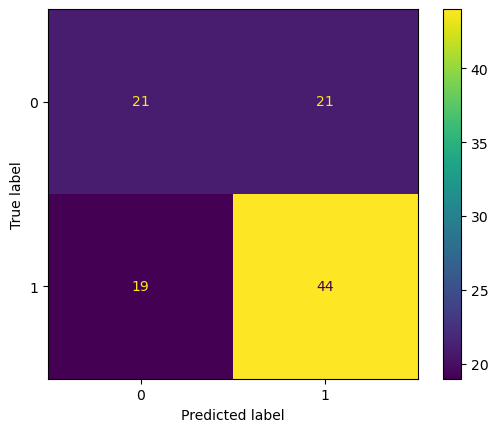

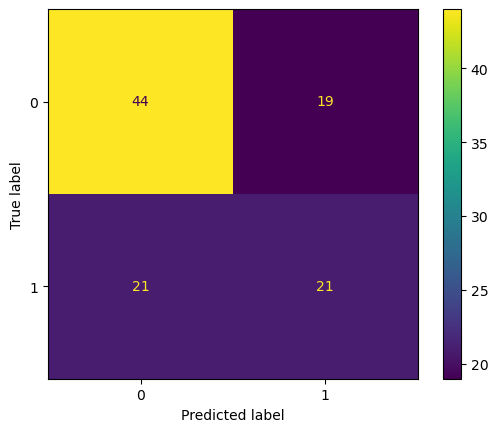

In [48]:
M2cm_aw_lgr = confusion_matrix(M2_y_aw_test, M2lgr_aw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M2cm_aw_lgr)
disp.plot()
plt.show()

M2cm_bw_lgr = confusion_matrix(M2_y_bw_test, M2lgr_bw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M2cm_bw_lgr)
disp.plot()
plt.show()